In [108]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data=pd.read_csv(r"C:\Users\ANSUMAN SAHU\Downloads\tips (data for regression problem).csv")

In [110]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [111]:
data.shape

(244, 7)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [113]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [114]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [115]:
data.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='day', ylabel='tip'>

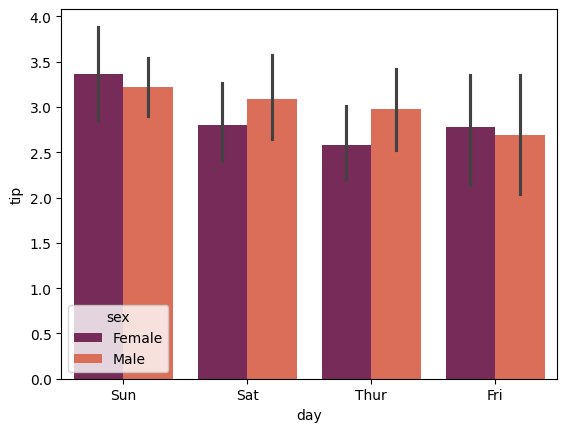

In [116]:
sns.barplot(data=data,x="day",y="tip",palette="rocket",hue="sex")

<Axes: xlabel='day', ylabel='tip'>

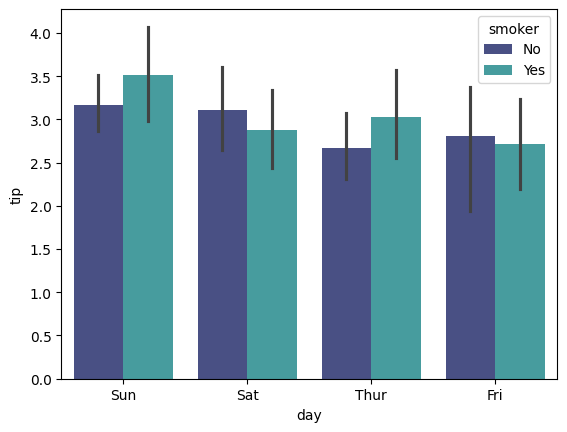

In [117]:
sns.barplot(data=data,x="day",y="tip",palette="mako",hue="smoker")

<Axes: xlabel='day', ylabel='tip'>

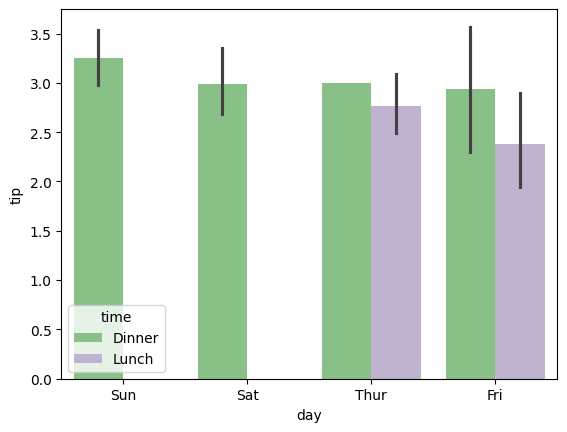

In [118]:
sns.barplot(data=data,x="day",y="tip",palette="Accent",hue="time")

<Axes: xlabel='total_bill', ylabel='tip'>

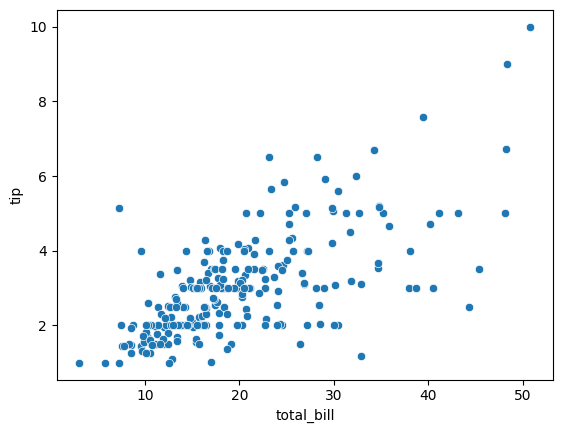

In [119]:
sns.scatterplot(data=data,x="total_bill",y="tip")

<Axes: xlabel='size', ylabel='tip'>

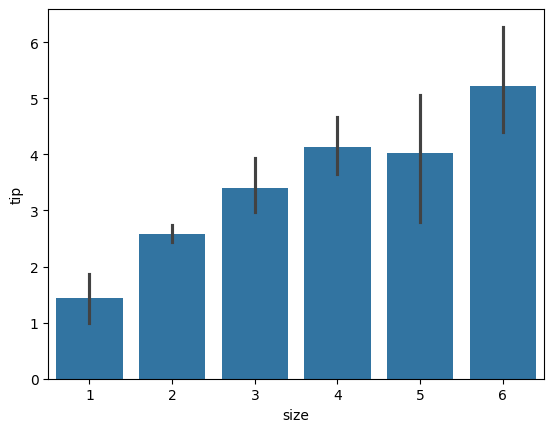

In [120]:
sns.barplot(data=data,x="size",y="tip")

<Axes: xlabel='sex', ylabel='tip'>

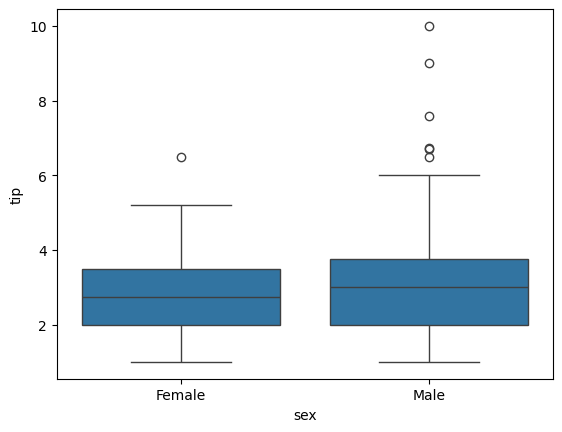

In [121]:
sns.boxplot(data=data,x="sex",y="tip")

<Axes: xlabel='smoker', ylabel='tip'>

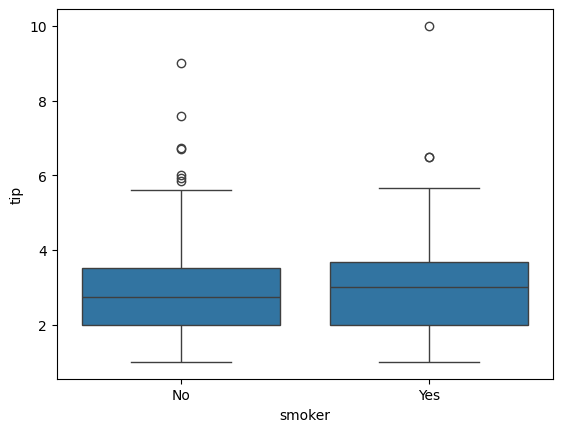

In [122]:
sns.boxplot(data=data,x="smoker",y="tip")

<Axes: xlabel='day', ylabel='tip'>

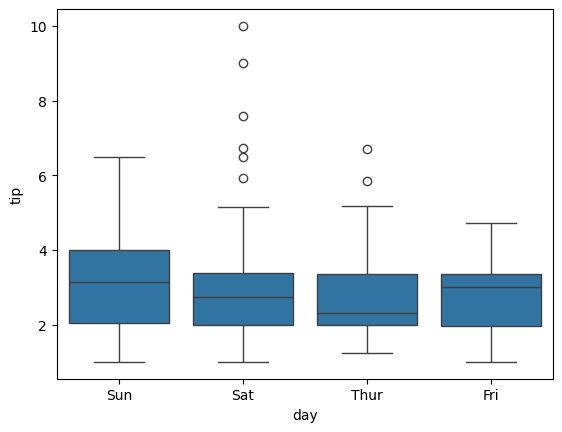

In [123]:
sns.boxplot(data=data,x="day",y="tip")

In [124]:

X = data.drop("tip", axis = 1)
y = data["tip"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train["day"]=le.fit_transform(X_train["day"])
X_test["day"] = le.transform(X_test["day"])
X_train["smoker"]=le.fit_transform(X_train["smoker"])
X_test["smoker"] = le.transform(X_test["smoker"])
X_train["sex"]=le.fit_transform(X_train["sex"])
X_test["sex"] = le.transform(X_test["sex"])
X_train["time"]=le.fit_transform(X_train["time"])
X_test["time"] = le.transform(X_test["time"])



In [127]:
X_train

,total_bill,sex,smoker,day,time,size
228,13.28,1,0,1,0,2
208,24.27,1,1,1,0,2
96,27.28,1,1,0,0,2
167,31.71,1,0,2,0,4
84,15.98,1,0,3,1,2
...,...,...,...,...,...,...
106,20.49,1,1,1,0,2
14,14.83,0,0,2,0,2
92,5.75,0,1,0,0,2
179,34.63,1,1,2,0,2


In [128]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_linear))

Linear Regression R2: 0.4441368826121931
Linear Regression MSE: 0.6948129686287711


In [129]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print('Ridge Regression R2:', r2_score(y_test, y_pred_linear))
print('Ridge Regression MSE:', mean_squared_error(y_test, y_pred_linear))

Ridge Regression R2: 0.4441368826121931
Ridge Regression MSE: 0.6948129686287711


In [130]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))
print('Lasso Regression MSE:', mean_squared_error(y_test, y_pred_lasso))

Lasso Regression R2: 0.4633126386311087
Lasso Regression MSE: 0.6708438230811841


In [131]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))
print('Decision Tree MSE:', mean_squared_error(y_test, y_pred_tree))



Decision Tree R2: -0.06402275877244601
Decision Tree MSE: 1.3299979591836735


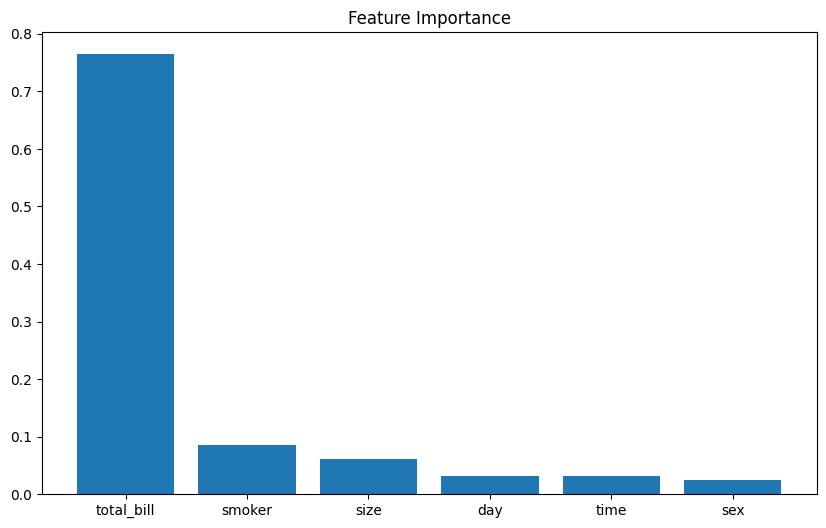

In [132]:
feature_importances = tree_reg.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), features[indices])
plt.show()

In [133]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_forest))


Random Forest R2: 0.23359000437227717
Random Forest MSE: 0.9579905332653078


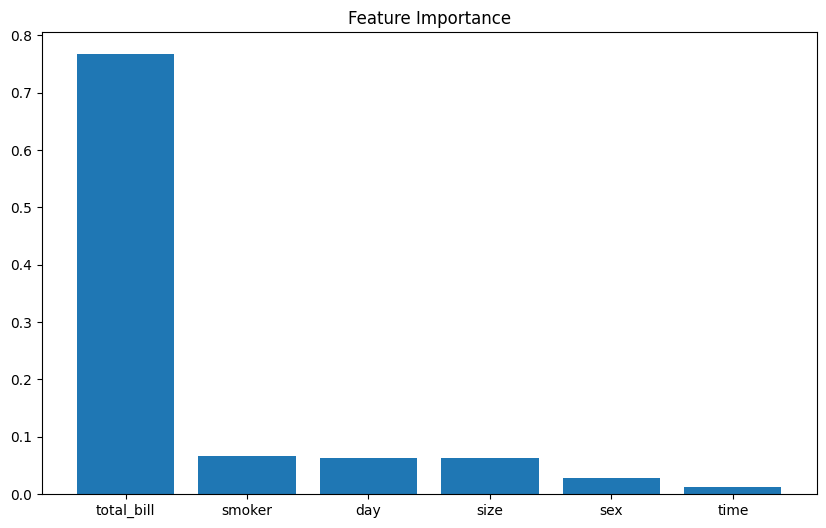

In [134]:
feature_importances = forest_reg.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), features[indices])
plt.show()

In [135]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))
print('KNN Regression MSE:', mean_squared_error(y_test, y_pred_knn))


KNN Regression R2: 0.3294034029001649
KNN Regression MSE: 0.8382265306122448


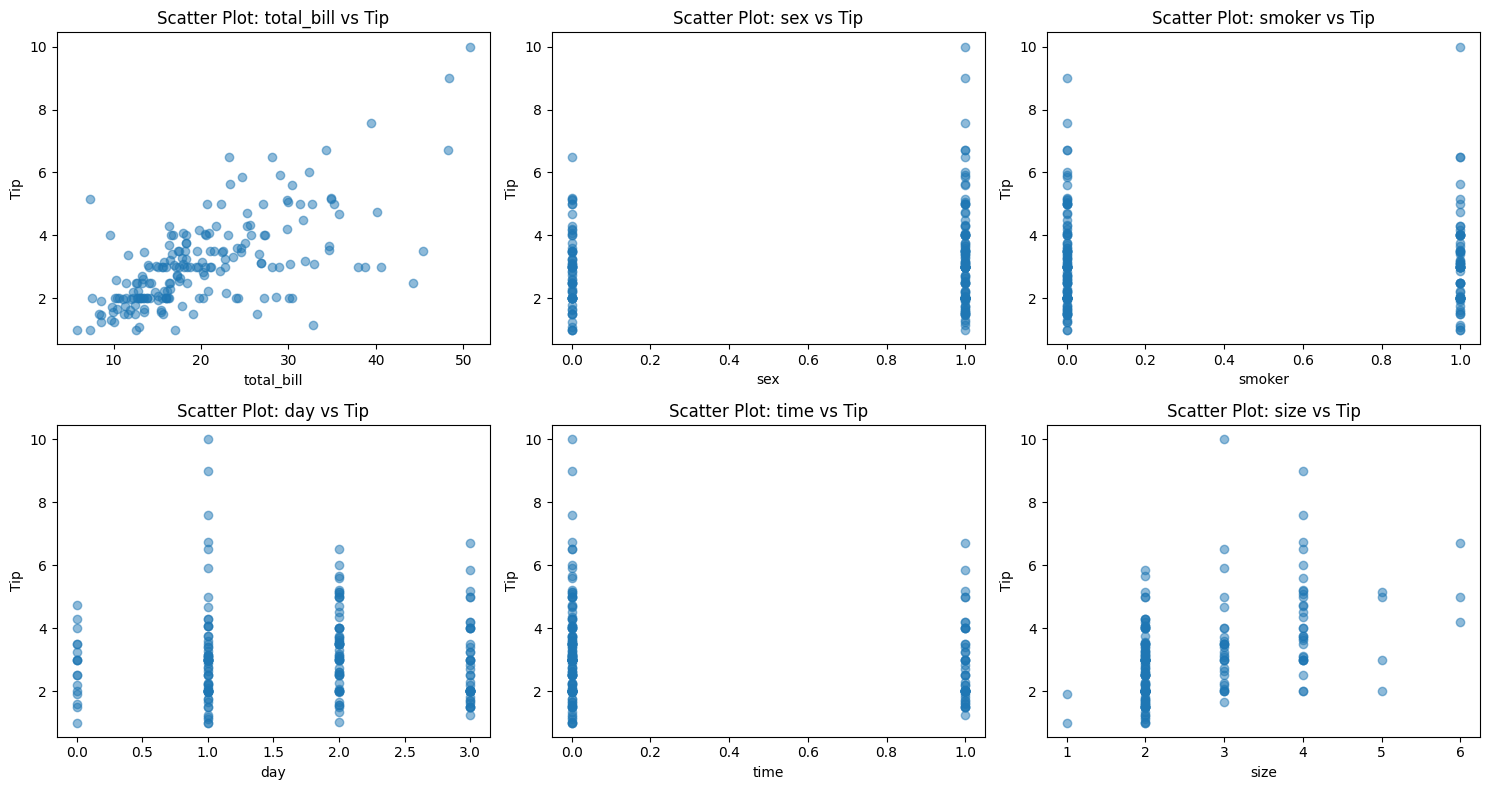

In [136]:
plt.figure(figsize=(15, 8))
for i, predictor in enumerate(X_train.columns, 1):
    plt.subplot(2, (len(X_train.columns) + 1) // 2, i)
    plt.scatter(X_train[predictor], y_train, alpha=0.5)
    plt.title(f'Scatter Plot: {predictor} vs Tip')
    plt.xlabel(predictor)
    plt.ylabel('Tip')
plt.tight_layout()
plt.show()

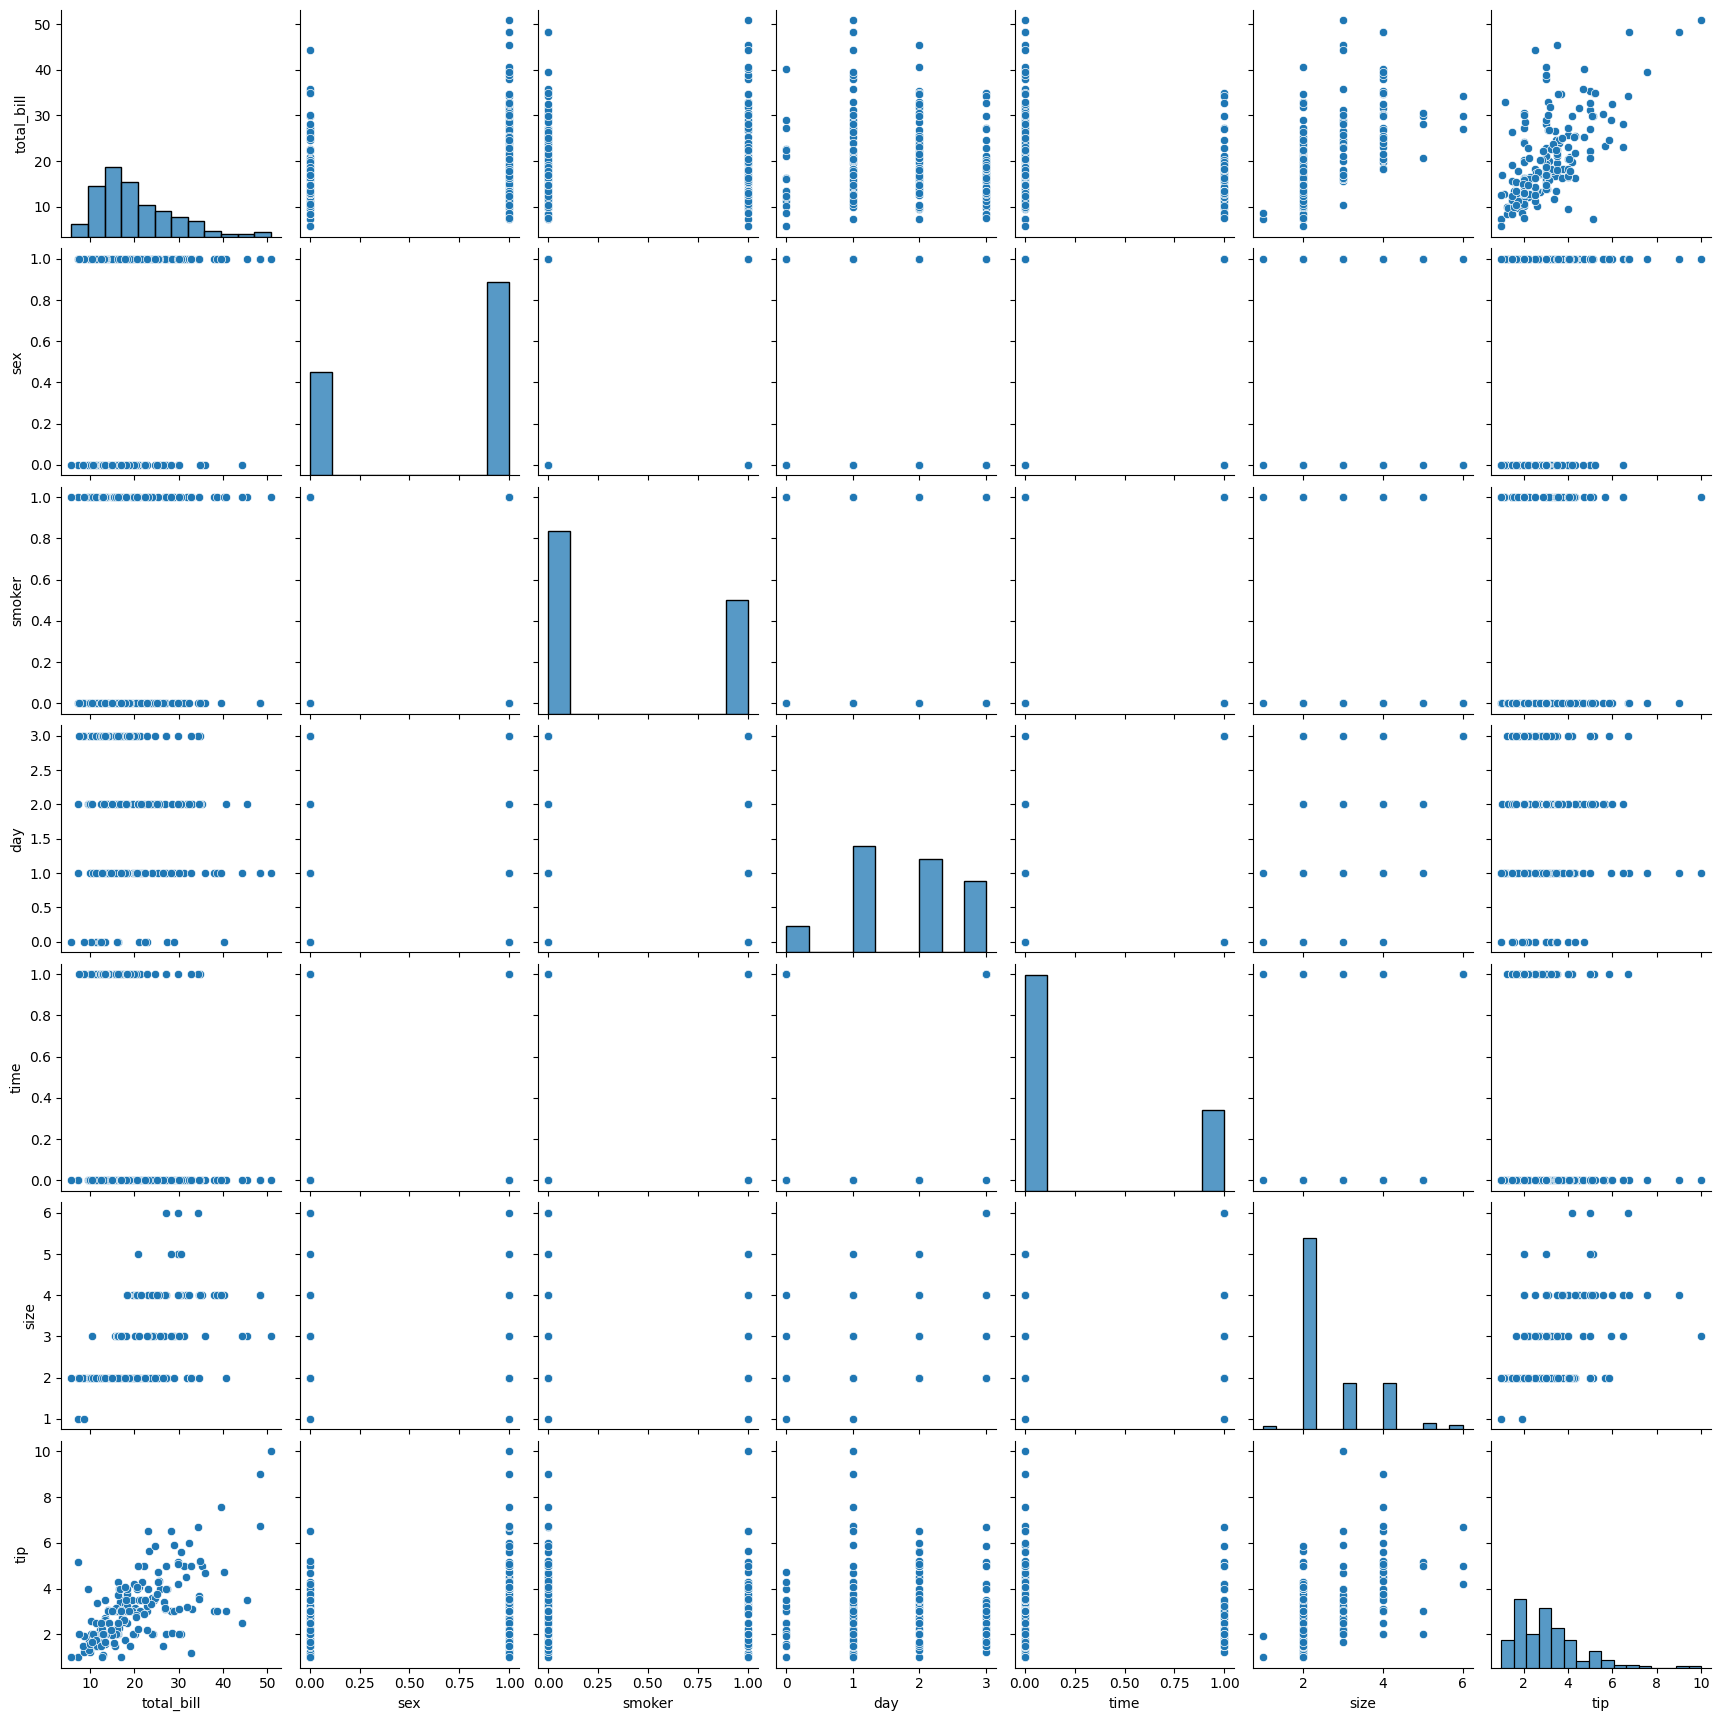

In [137]:
train_data = X_train.copy()
train_data['tip'] = y_train
sns.pairplot(train_data)
plt.show()

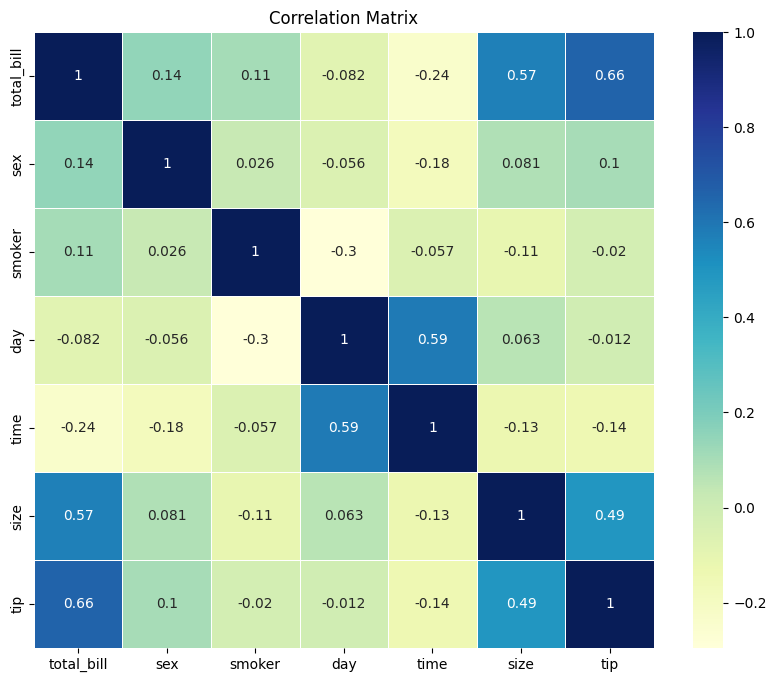

In [138]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [139]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
# Add constant for intercept
x_train_const = sm.add_constant(X_train)

# Fit an OLS model
model = sm.OLS(y_train, x_train_const).fit()

# Perform the Rainbow test
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f'Rainbow test statistic: {rainbow_stat}, p-value: {rainbow_p_value}')

# Interpretation
if rainbow_p_value > 0.05:
    print("No evidence against linearity (p-value > 0.05). The data may follow a linear trend.")
else:
    print("Evidence against linearity (p-value <= 0.05). The data may not follow a linear trend.")

Rainbow test statistic: 1.594118024132204, p-value: 0.012798910686288507
Evidence against linearity (p-value <= 0.05). The data may not follow a linear trend.


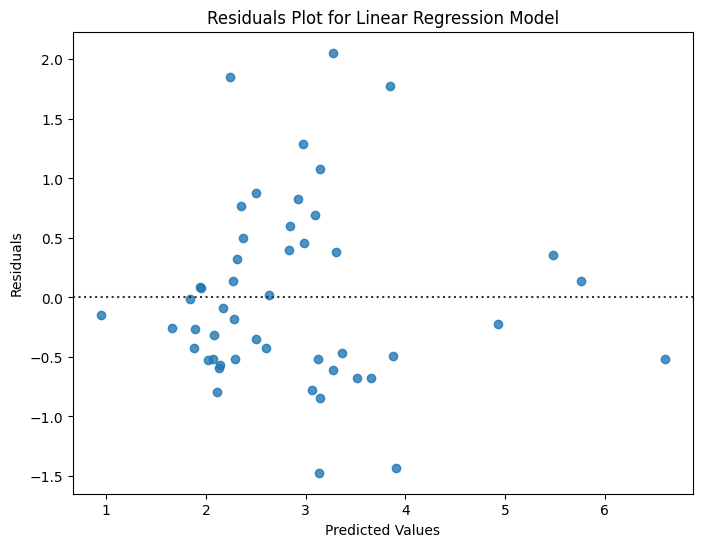

In [140]:
residuals = y_test - y_pred_linear

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_linear, y=residuals)
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

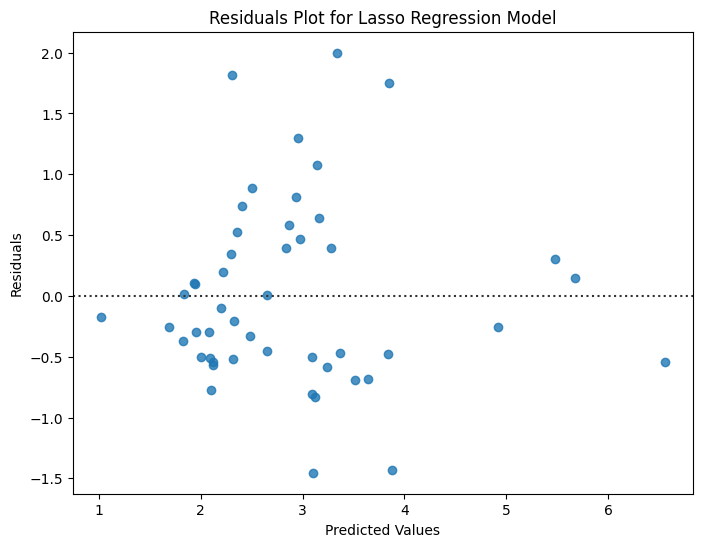

In [141]:
residuals = y_test - y_pred_lasso

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_lasso, y=residuals)
plt.title("Residuals Plot for Lasso Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

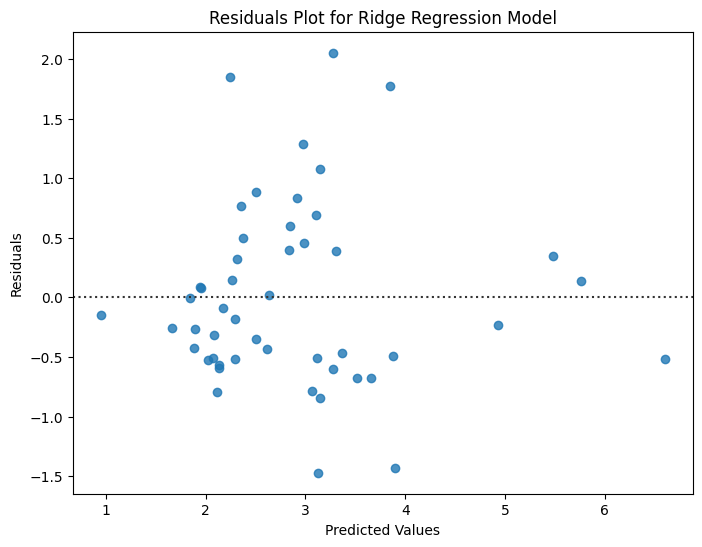

In [142]:
residuals = y_test - y_pred_ridge

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_ridge, y=residuals)
plt.title("Residuals Plot for Ridge Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

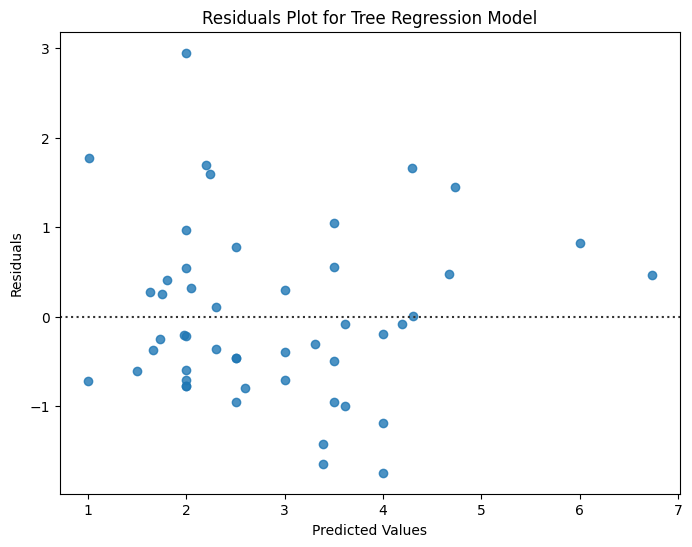

In [143]:
residuals = y_test - y_pred_tree

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_tree, y=residuals)
plt.title("Residuals Plot for Tree Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

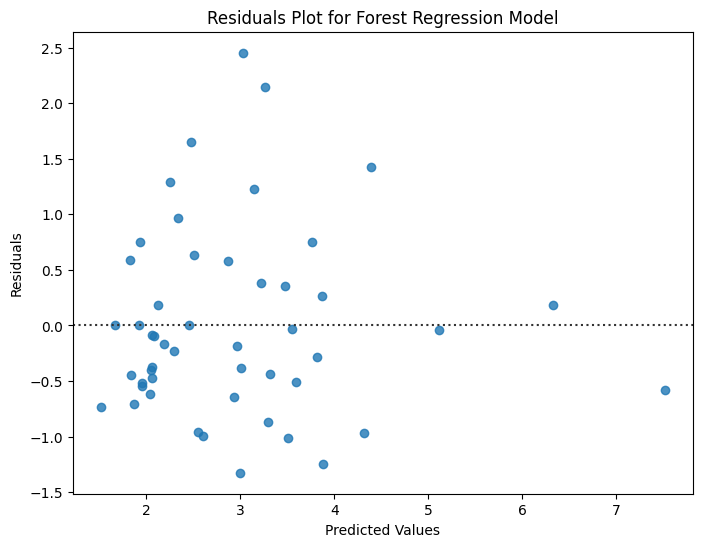

In [144]:
residuals = y_test - y_pred_forest

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_forest, y=residuals)
plt.title("Residuals Plot for Forest Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

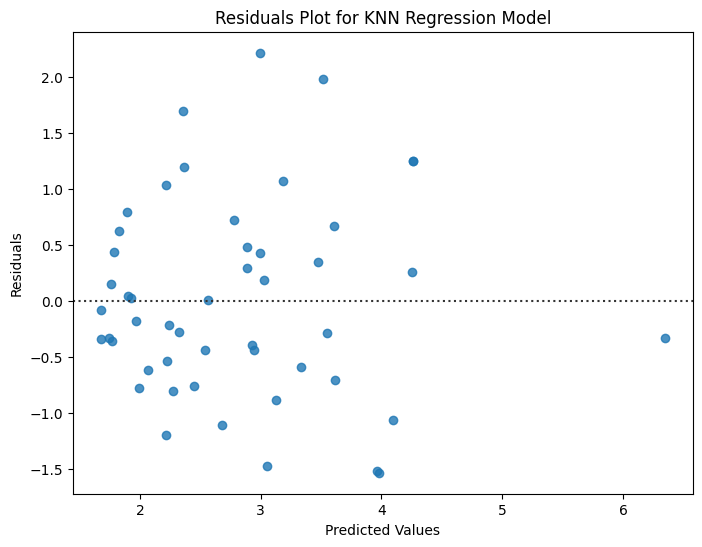

In [145]:
residuals = y_test - y_pred_knn

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_knn, y=residuals)
plt.title("Residuals Plot for KNN Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()